# 프로젝트 제목: SynDelay 데이터를 활용한 배송 지연 예측 모델링

## 1. 데이터셋 소개
본 프로젝트는 공급망 내 배송 지연을 예측하기 위해 **SynDelay** 데이터셋을 사용합니다.

* **출처:** Xu, L., Long, Y., & Brintrup, A. (2025). SynDelay: A Synthetic Dataset for Delivery Delay Prediction.
* **데이터 성격:** 실제 공급망 데이터를 기반으로 생성된 합성 데이터(Synthetic Dataset)입니다.

In [243]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 시각화 한글 폰트 설정 (필요시)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [244]:
HOME = os.getcwd()
HOME


'c:\\Users\\ysj58\\github\\DataScience\\E-commerce\\JYS'

In [245]:
import pandas as pd 
import numpy as np


Train = pd.read_csv(os.path.join(HOME, 'data','Train.csv'))

In [246]:
Train.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,PAYMENT,-32.924488,278.95000,38,Kids' Golf Clubs,Caguas,Puerto Rico,12446.5625,Corporate,PR,...,Caribbean,Martinique,PENDING_PAYMENT,858,38,GolfBuddy VT3 GPS Watch,129.99,42177.500,Second Class,2
1,DEBIT,107.874500,263.98000,17,Cleats,Caguas,Puerto Rico,7782.0170,Corporate,PR,...,East Africa,Copperbelt,COMPLETE,365,17,Perfect Fitness Perfect Rip Deck,59.99,42502.390,Same Day,1
2,PAYMENT,35.770718,109.65013,17,Cleats,Caguas,Puerto Rico,7378.1113,Consumer,PR,...,West Asia,Ankara,PENDING_PAYMENT,365,17,Perfect Fitness Perfect Rip Deck,59.99,42951.266,Standard Class,0
3,PAYMENT,43.587560,113.09000,18,Men's Footwear,Caguas,Puerto Rico,1448.6765,Consumer,PR,...,Central America,Francisco Morazan,PENDING_PAYMENT,403,18,Nike Men's CJ Elite 2 TD Football Cleat,129.99,42181.900,Second Class,2
4,PAYMENT,49.804802,191.98090,9,Cardio Equipment,Madison,EE. UU.,5123.5254,Corporate,WI,...,Central America,Leon,PENDING_PAYMENT,191,9,Nike Men's Free 5.0+ Running Shoe,99.99,42632.820,Standard Class,1


### 검증용 데이터 분리

In [247]:
from sklearn.model_selection import train_test_split

# 1. stratify 옵션을 써서 정답(Reached.on.Time_Y.N) 비율을 유지하며 8:2로 나눕니다.
# 이 함수는 내부적으로 데이터를 랜덤하게 섞어주기 때문에 sample을 따로 안 써도 됩니다.
part1, part2 = train_test_split(Train, 
                                test_size=0.2, 
                                random_state=42, 
                                stratify=Train['label'])

# 2. 각각 파일로 저장
part1.to_csv('data/train_df.csv', index=False)
part2.to_csv('data/test_df.csv', index=False)

print("데이터 분할 및 저장 완료!")
print(f"학습용: {part1.shape}, 테스트용: {part2.shape}")

데이터 분할 및 저장 완료!
학습용: (124390, 41), 테스트용: (31098, 41)


In [248]:
train_df = pd.read_csv('data/train_df.csv')
test_df = pd.read_csv('data/test_df.csv')

In [249]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124390 entries, 0 to 124389
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   payment_type              124390 non-null  object 
 1   profit_per_order          124390 non-null  float64
 2   sales_per_customer        124390 non-null  float64
 3   category_id               124390 non-null  int64  
 4   category_name             124390 non-null  object 
 5   customer_city             124390 non-null  object 
 6   customer_country          124390 non-null  object 
 7   customer_id               124390 non-null  float64
 8   customer_segment          124390 non-null  object 
 9   customer_state            124390 non-null  object 
 10  customer_zipcode          124390 non-null  float64
 11  department_id             124390 non-null  int64  
 12  department_name           124390 non-null  object 
 13  latitude                  124390 non-null  f

In [250]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31098 entries, 0 to 31097
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              31098 non-null  object 
 1   profit_per_order          31098 non-null  float64
 2   sales_per_customer        31098 non-null  float64
 3   category_id               31098 non-null  int64  
 4   category_name             31098 non-null  object 
 5   customer_city             31098 non-null  object 
 6   customer_country          31098 non-null  object 
 7   customer_id               31098 non-null  float64
 8   customer_segment          31098 non-null  object 
 9   customer_state            31098 non-null  object 
 10  customer_zipcode          31098 non-null  float64
 11  department_id             31098 non-null  int64  
 12  department_name           31098 non-null  object 
 13  latitude                  31098 non-null  float64
 14  longit

### 데이터 분석

| 원래 컬럼명 | 변경된 한글명 |
| :--- | :--- |
| paymenttype | 결제방식 |
| profit_perorder | 주문당이익 |
| sales_percustomer | 고객별매출액 |
| category_id | 카테고리_ID |
| categoryname | 카테고리이름 |
| customercity | 고객도시 |
| customercountry | 고객국가 |
| customer_id | 고객_ID |
| customersegment | 고객분류 |
| customerstate | 고객지역_주 |
| customerzipcode | 고객우편번호 |
| department_id | 부서_ID |
| departmentname | 부서이름 |
| latitude | 위도 |
| longitude | 경도 |
| market | 시장_권역 |
| ordercity | 주문도시 |
| ordercountry | 주문국가 |
| order_customerid | 주문고객_ID |
| orderdate | 주문날짜 |
| order_id | 주문_ID |
| order_item_cardprodid | 품목상품_카드_ID |
| order_itemdiscount | 품목할인_금액 |
| order_item_discountrate | 품목할인율 |
| order_itemid | 주문품목_ID |
| order_item_productprice | 품목판매_단가 |
| order_item_profitratio | 품목이익률 |
| order_itemquantity | 주문수량 |
| sales | 총_매출액 |
| order_item_totalamount | 실제결제_금액 |
| order_profit_perorder | 주문별상세_이익 |
| orderregion | 주문지역 |
| orderstate | 주문지역_주 |
| orderstatus | 주문상태 |
| product_cardid | 상품카드_ID |
| product_categoryid | 상품카테고리_ID |
| product_name | 상품명 |
| productprice | 상품단가 |
| shippingdate | 배송날짜 |
| shippingmode | 배송방식 |
| label | 지연여부라벨 |

In [251]:
train_df['payment_type'].value_counts()

payment_type
DEBIT       49677
TRANSFER    30388
PAYMENT     30379
CASH        13946
Name: count, dtype: int64

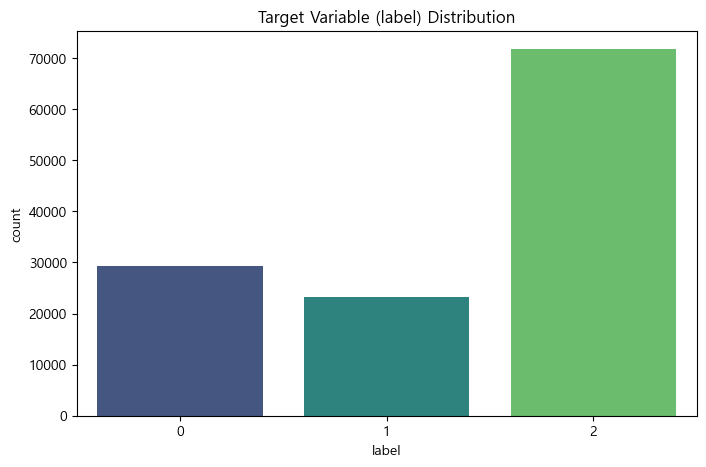

Counts per label:
label
2    71767
0    29379
1    23244
Name: count, dtype: int64

Proportions per label:
label
2    0.576952
0    0.236185
1    0.186864
Name: proportion, dtype: float64


In [252]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='label', palette='viridis')
plt.title('Target Variable (label) Distribution')
plt.show()

print("Counts per label:")
print(train_df['label'].value_counts())
print("\nProportions per label:")
print(train_df['label'].value_counts(normalize=True))

Correlation with 'label':
label                       1.000000
order_item_discount_rate    0.004735
customer_zipcode            0.003236
order_date                  0.001708
customer_id                 0.001649
shipping_date               0.001614
order_item_discount         0.000773
order_customer_id           0.000648
order_item_cardprod_id      0.000642
product_card_id             0.000130
product_category_id        -0.000327
category_id                -0.000327
order_item_quantity        -0.001031
product_price              -0.001302
order_item_product_price   -0.001302
department_id              -0.001498
latitude                   -0.001892
sales                      -0.001913
longitude                  -0.002006
sales_per_customer         -0.002154
order_item_total_amount    -0.002256
order_id                   -0.002520
order_item_id              -0.002996
order_item_profit_ratio    -0.004921
order_profit_per_order     -0.008031
profit_per_order           -0.009200
Name: label,

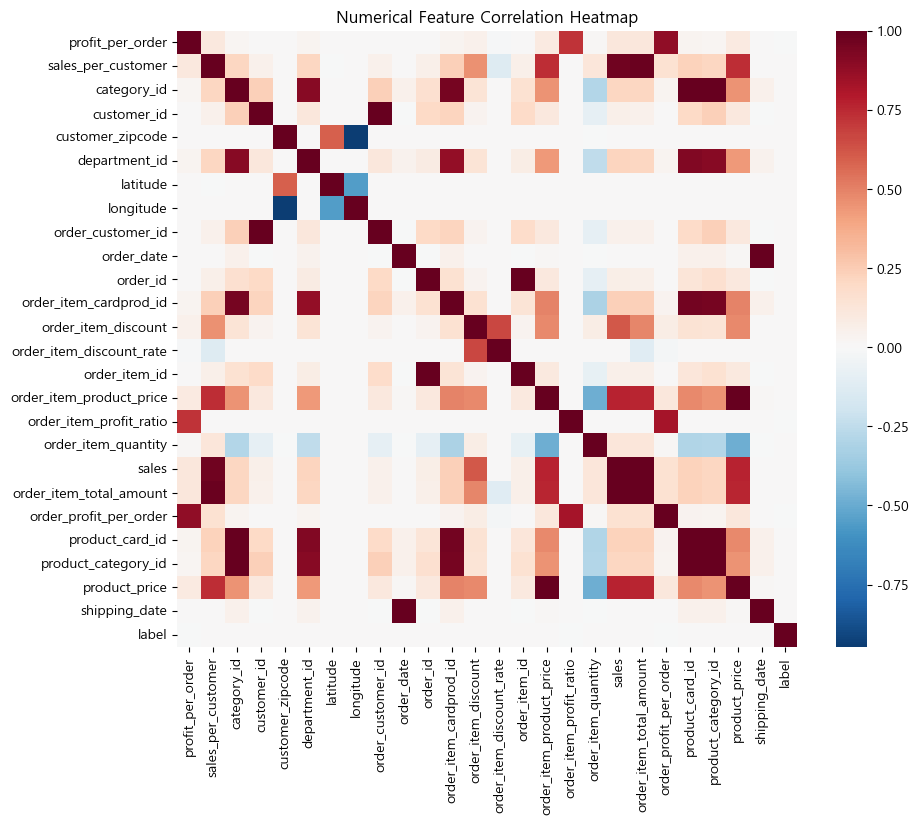

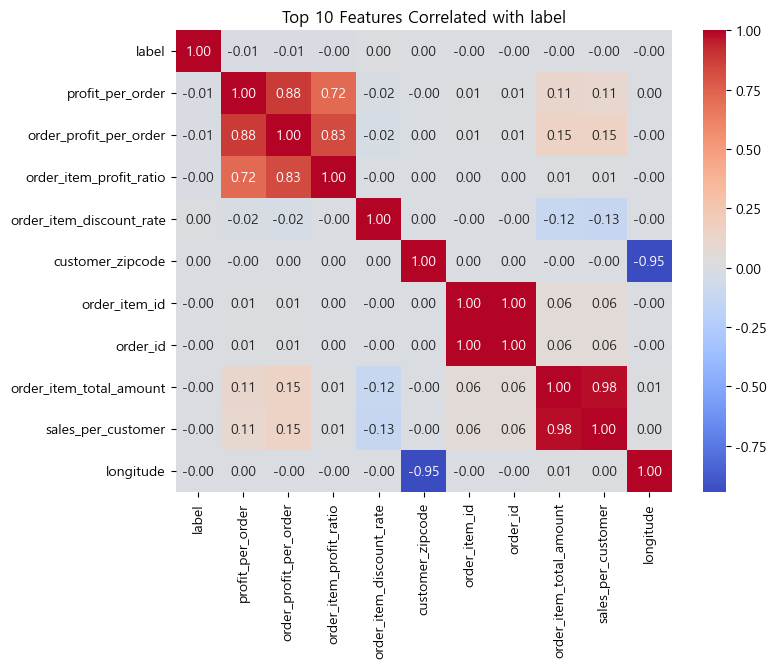

In [254]:
# 수치형 변수들 간의 상관계수 계산
numerical_df = train_df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()

# 'label'과의 상관계수만 추출하여 정렬
target_corr = corr_matrix['label'].sort_values(ascending=False)

print("Correlation with 'label':")
print(target_corr)

# 상관관계 히트맵 (상위 상관관계 변수 위주)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='RdBu_r', center=0)
plt.title('Numerical Feature Correlation Heatmap')
plt.show()

# label과 상관관계가 높은 Top 10 변수 히트맵
top_f = target_corr.abs().sort_values(ascending=False).index[:11]
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_df[top_f].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top 10 Features Correlated with label')
plt.show()